In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential, Model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, TensorBoard
from keras.optimizers import Adam, SGD
from keras.initializers import glorot_uniform
from keras.utils import plot_model
import keras.backend as K
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import sklearn
from matplotlib.colors import LogNorm
from sklearn.manifold import TSNE
import data
import model

Using TensorFlow backend.


In [2]:
batch_size = 32
training_size = 2913
testing_size = 210

train_gen = data.data_gen('dataset/images_train', 'dataset/annotations_train', batch_size=batch_size, one_hot=True)
test_gen = data.data_gen('dataset/images_test', 'dataset/annotations_test', batch_size=batch_size, one_hot=True)

def normalize(x):
    value_range = x.max() - x.min()
    starts_from_zero = x - np.min(x)
    return starts_from_zero / value_range

In [3]:
x, y, t = None, None, None
for i in range(6):
    x_tmp, y_tmp = next(train_gen)
    t_tmp = np.array([np.unique(np.argmax(y_tmp, axis=3).reshape(batch_size, -1)[i])[1] for i in range(batch_size)])
    x = x_tmp if x is None else np.vstack((x, x_tmp))
    y = y_tmp if y is None else np.vstack((y, y_tmp))
    t = t_tmp if t is None else np.concatenate((t, t_tmp))

## Final ResNet layer t-SNE visualization

In [4]:
m = keras.models.load_model('experiments/model.2020_06_09-09_55_28.h5', custom_objects={'loss': model.weighted_categorical_crossentropy([.1 if i==0 else 1 for i in range(21)])})

In [9]:
resnet = Model(m.inputs, m.get_layer('activation_22').output)
features = resnet.predict(x)
tsne = TSNE(n_components=2, random_state=0).fit_transform(features.reshape(x.shape[0], -1))

In [10]:
tsne[:,0] = normalize(tsne[:,0])
tsne[:,1] = normalize(tsne[:,1])

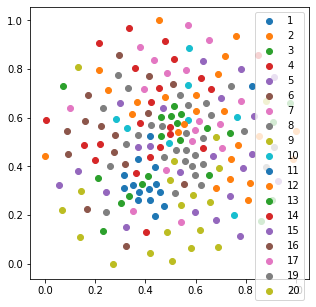

In [24]:
plt.figure(figsize=(5,5))
for cls in np.unique(t):
    plt.scatter(tsne[t==cls,0], tsne[t==cls,1], label=cls)
plt.legend()
#plt.savefig('tsne_encoderAll.png', bbox_inches='tight')

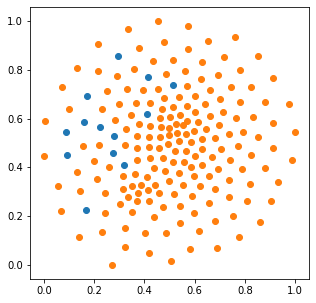

In [30]:
plt.figure(figsize=(5,5))
i = 6
plt.scatter(tsne[t==i,0], tsne[t==i,1], label=cls)
plt.scatter(tsne[t!=i,0], tsne[t!=i,1], label=cls)
#plt.savefig('tsne_encoder{}.png'.format(i), bbox_inches='tight')

## Decoder layer t-SNE visualization

In [32]:
decoder = Model(m.inputs, m.get_layer('conv2d_7').output)
features = decoder.predict(x)
tsne = TSNE(n_components=2, random_state=0).fit_transform(features.reshape(x.shape[0], -1))

In [33]:
tsne[:,0] = normalize(tsne[:,0])
tsne[:,1] = normalize(tsne[:,1])

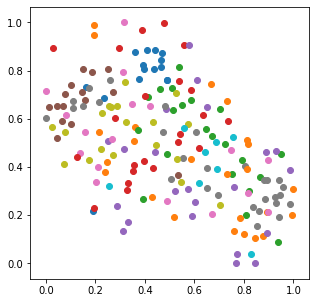

In [35]:
plt.figure(figsize=(5,5))
for cls in np.unique(t):
    plt.scatter(tsne[t==cls,0], tsne[t==cls,1], label=cls)
#plt.legend()
plt.savefig('tsne_decoderAll.png', bbox_inches='tight')

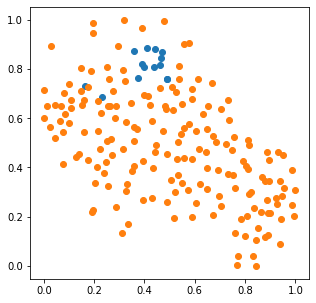

In [39]:
plt.figure(figsize=(5,5))
i = 1
plt.scatter(tsne[t==i,0], tsne[t==i,1], label=cls)
plt.scatter(tsne[t!=i,0], tsne[t!=i,1], label=cls)
#plt.savefig('tsne_decoder{}.png'.format(i), bbox_inches='tight')